## Loading packages & libraries

In [1]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Other:
import json

# Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scikit-Learn stuff
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names, mean_squared_error, r2_score, mean_squared_error, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import VotingClassifier, BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier

## Accessing the dataset

In [2]:
# loading dataset
movies = pd.read_csv('movie_dataset_copy2.csv', parse_dates = ['release_date'])
movies.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


## Making a detailed release date into a release year

In [3]:
movies['release_year'] = movies.release_date._values.year
movies['release_year']

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: release_year, Length: 4803, dtype: float64

## Filtering the data

In [4]:
exclude = ["index", "genres", "homepage", "keywords", "overview", 
           "production_companies", "production_countries", "release_date", 
           "spoken_languages", "status", "tagline", "original_title", 
           "vote_count", "cast", "crew"]

movies_filtered = movies.loc[:, ~movies.columns.isin(exclude)]
movies_filtered.head(5)

,budget,id,original_language,popularity,revenue,runtime,title,vote_average,director,release_year
0,237000000,19995,en,150.437577,2787965087,162.0,Avatar,7.2,James Cameron,2009.0
1,300000000,285,en,139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,Gore Verbinski,2007.0
2,245000000,206647,en,107.376788,880674609,148.0,Spectre,6.3,Sam Mendes,2015.0
3,250000000,49026,en,112.312950,1084939099,165.0,The Dark Knight Rises,7.6,Christopher Nolan,2012.0
4,260000000,49529,en,43.926995,284139100,132.0,John Carter,6.1,Andrew Stanton,2012.0


In [5]:
column_1 = "id"
column_2 = "title"

cols = [column_1, column_2] + [c for c in movies_filtered.columns if c not in [column_1, column_2]]
movies_indexed = movies_filtered[cols]

movies_indexed.head(5)

,id,title,budget,original_language,popularity,revenue,runtime,vote_average,director,release_year
0,19995,Avatar,237000000,en,150.437577,2787965087,162.0,7.2,James Cameron,2009.0
1,285,Pirates of the Caribbean: At World's End,300000000,en,139.082615,961000000,169.0,6.9,Gore Verbinski,2007.0
2,206647,Spectre,245000000,en,107.376788,880674609,148.0,6.3,Sam Mendes,2015.0
3,49026,The Dark Knight Rises,250000000,en,112.312950,1084939099,165.0,7.6,Christopher Nolan,2012.0
4,49529,John Carter,260000000,en,43.926995,284139100,132.0,6.1,Andrew Stanton,2012.0


In [6]:
top_movies_by_vote = movies_indexed.sort_values(by='popularity', ascending=False)

top_movies_by_vote.head(10)

,id,title,budget,original_language,popularity,revenue,runtime,vote_average,director,release_year
546,211672,Minions,74000000,en,875.581305,1156730962,91.0,6.4,Kyle Balda,2015.0
95,157336,Interstellar,165000000,en,724.247784,675120017,169.0,8.1,Christopher Nolan,2014.0
788,293660,Deadpool,58000000,en,514.569956,783112979,108.0,7.4,Tim Miller,2016.0
94,118340,Guardians of the Galaxy,170000000,en,481.098624,773328629,121.0,7.9,James Gunn,2014.0
127,76341,Mad Max: Fury Road,150000000,en,434.278564,378858340,120.0,7.2,George Miller,2015.0
28,135397,Jurassic World,150000000,en,418.708552,1513528810,124.0,6.5,Colin Trevorrow,2015.0
199,22,Pirates of the Caribbean: The Curse of the Bla...,140000000,en,271.972889,655011224,143.0,7.5,Gore Verbinski,2003.0
82,119450,Dawn of the Planet of the Apes,170000000,en,243.791743,710644566,130.0,7.3,Matt Reeves,2014.0
200,131631,The Hunger Games: Mockingjay - Part 1,125000000,en,206.227151,752100229,123.0,6.6,Francis Lawrence,2014.0
88,177572,Big Hero 6,165000000,en,203.734590,652105443,102.0,7.8,Chris Williams,2014.0


## Release year statistics

In [7]:
movies_indexed['release_year'].value_counts()

release_year
2009.0    247
2014.0    238
2006.0    237
2013.0    231
2008.0    227
         ... 
1935.0      1
1932.0      1
1916.0      1
1934.0      1
1925.0      1
Name: count, Length: 90, dtype: int64

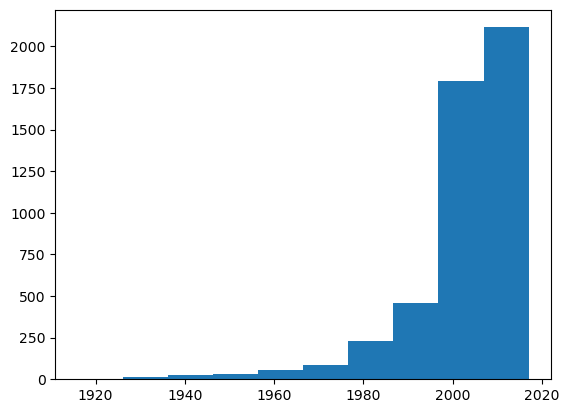

In [8]:
fig, ax = plt.subplots()

ax.hist(movies_indexed['release_year'])

plt.show()

## Language statistics

In [9]:
movies_indexed['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

## Director statistics

In [10]:
movies_indexed['director'].value_counts()

director
Steven Spielberg     27
Woody Allen          21
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         16
                     ..
Timothy Bjorklund     1
Marcus Dunstan        1
Lorene Scafaria       1
Jeff Lowell           1
Brian Herzlinger      1
Name: count, Length: 2349, dtype: int64

<Axes: ylabel='director'>

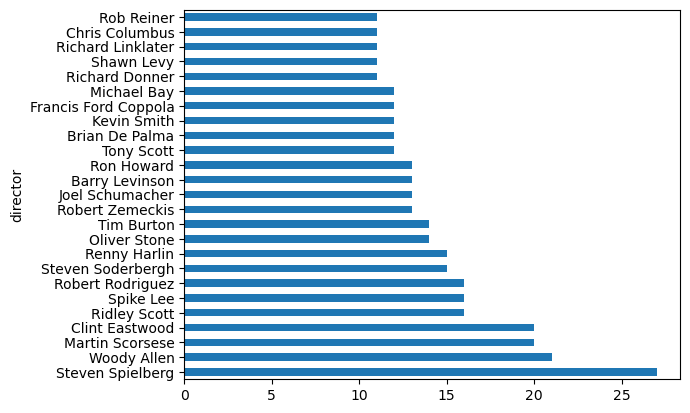

In [11]:
top_directors = movies_indexed['director'].value_counts().head(25)
top_directors.plot(kind='barh')

## Runtime statistics

In [12]:
movies_indexed['runtime'].value_counts()

runtime
90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
338.0      1
216.0      1
166.0      1
194.0      1
60.0       1
Name: count, Length: 156, dtype: int64

## Vote average statistics

In [13]:
movies_indexed['vote_average'].value_counts()

vote_average
6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: count, Length: 71, dtype: int64

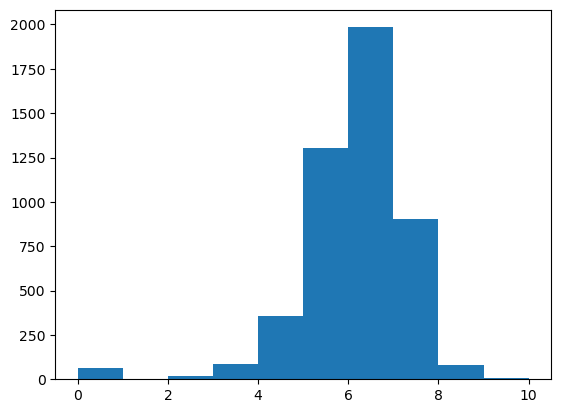

In [14]:
fig, ax = plt.subplots()

ax.hist(movies_indexed['vote_average'])

plt.show()

## Vote average for a movie by director

In [15]:
movies_indexed['director'].value_counts().head(20)

director
Steven Spielberg        27
Woody Allen             21
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            16
Spike Lee               16
Robert Rodriguez        16
Steven Soderbergh       15
Renny Harlin            15
Oliver Stone            14
Tim Burton              14
Robert Zemeckis         13
Joel Schumacher         13
Barry Levinson          13
Ron Howard              13
Tony Scott              12
Brian De Palma          12
Kevin Smith             12
Francis Ford Coppola    12
Michael Bay             12
Name: count, dtype: int64

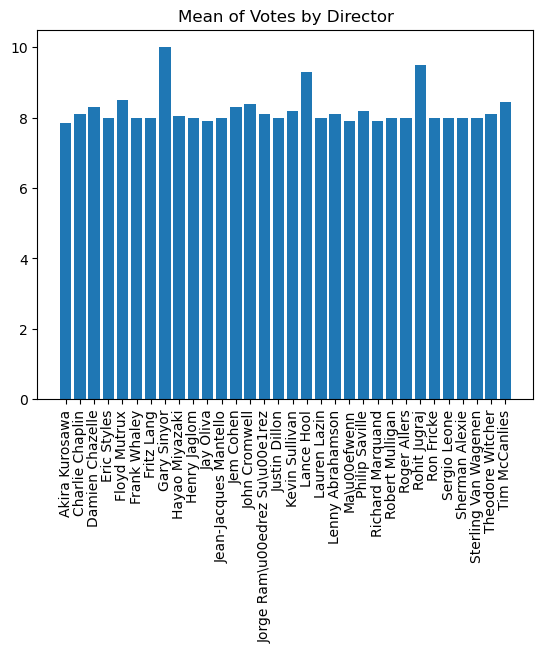

In [16]:
movies_director_vote_mean = movies_indexed.groupby('director')['vote_average'].mean().reset_index()

movies_director_vote_mean = movies_director_vote_mean[movies_director_vote_mean["vote_average"] > 7.8]

plt.bar(movies_director_vote_mean['director'], movies_director_vote_mean['vote_average'])
plt.title("Mean of Votes by Director")
plt.xticks(rotation=90)

plt.show()

## Vote average for a movie by release year

In [55]:
movies_indexed = movies_indexed[(movies_indexed['revenue'] != 0) & (movies_indexed['budget'] != 0)]
movies_indexed.value_counts()

vote_average  budget    revenue    runtime  release_year  budget_million  revenue_million
0.0           700000    10508      107.0    1999.0        0.7             0.010508           1
6.7           35000000  75225693   119.0    2008.0        35.0            75.225693          1
              30000000  13001257   114.0    2004.0        30.0            13.001257          1
                        18618284   108.0    2005.0        30.0            18.618284          1
                        105834556  125.0    2002.0        30.0            105.834556         1
                                                                                            ..
6.0           18500000  31912793   100.0    2009.0        18.5            31.912793          1
              19000000  4750000    188.0    1964.0        19.0            4.750000           1
                        18755936   109.0    2008.0        19.0            18.755936          1
                        35387212   108.0    2011.0     

In [56]:
movies_indexed['budget_million'] = movies_indexed['budget']/1000000
movies_indexed['revenue_million'] = movies_indexed['revenue']/1000000

movies_indexed.head(5)

,vote_average,budget,revenue,runtime,release_year,budget_million,revenue_million
0,7.2,237000000,2787965087,162.0,2009.0,237.0,2787.965087
1,6.9,300000000,961000000,169.0,2007.0,300.0,961.000000
2,6.3,245000000,880674609,148.0,2015.0,245.0,880.674609
3,7.6,250000000,1084939099,165.0,2012.0,250.0,1084.939099
4,6.1,260000000,284139100,132.0,2012.0,260.0,284.139100


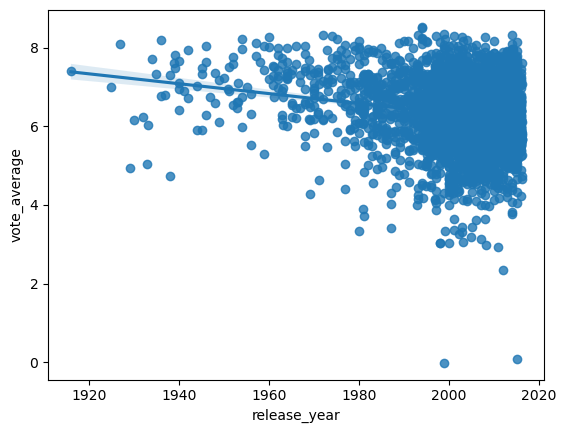

In [57]:
sns.regplot(x = 'release_year', y = 'vote_average', x_jitter = 0.1, y_jitter = 0.1, data = movies_indexed)
plt.show()

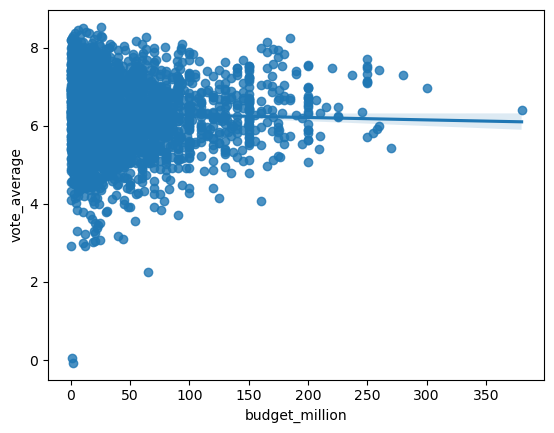

In [58]:
sns.regplot(x = 'budget_million', y = 'vote_average', x_jitter = 0.1, y_jitter = 0.1, data = movies_indexed)
plt.show()

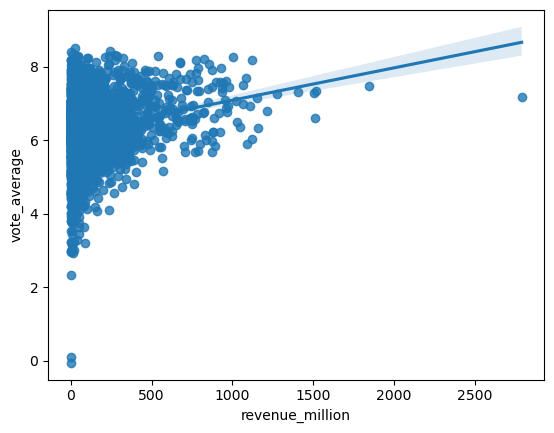

In [59]:
sns.regplot(x = 'revenue_million', y = 'vote_average', x_jitter = 0.1, y_jitter = 0.1, data = movies_indexed)
plt.show()

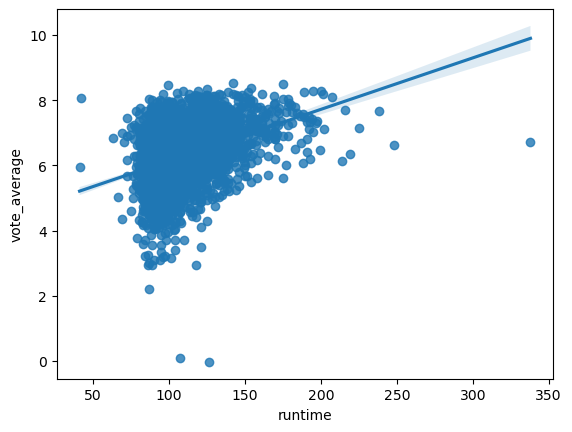

In [40]:
sns.regplot(x = 'runtime', y = 'vote_average', x_jitter = 0.1, y_jitter = 0.1, data = movies_indexed)
plt.show()

## Predictions

## Setting target and predictors

In [21]:
movies_indexed.columns

Index(['id', 'title', 'budget', 'original_language', 'popularity', 'revenue',
       'runtime', 'vote_average', 'director', 'release_year'],
      dtype='object')

In [22]:
movies_indexed.value_counts()

id      title                                                     budget     original_language  popularity  revenue    runtime  vote_average  director        release_year
5       Four Rooms                                                4000000    en                 22.876230   4300000    98.0     6.5           Allison Anders  1995.0          1
38031   You Will Meet a Tall Dark Stranger                        22000000   en                 12.465400   0          98.0     5.8           Woody Allen     2010.0          1
37985   The Trials Of Darryl Hunt                                 0          en                 0.150660    0          106.0    6.8           Ricki Stern     2007.0          1
37964   Brown Sugar                                               8000000    en                 3.501158    27362712   109.0    7.0           Rick Famuyiwa   2002.0          1
37958   Immortals                                                 75000000   en                 37.917002   226904017  110.0 

In [23]:
target = "vote_average"
predictors = ['budget', 'revenue', 'runtime', 'release_year']

In [50]:
movies_indexed = movies_indexed[[target] + predictors].dropna()
y = movies_indexed[target]
X = movies_indexed[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 12345)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model = ols('vote_average ~ budget_million + revenue_million + runtime + release_year', data = movies_numeric).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     267.6
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          6.40e-208
Time:                        16:53:26   Log-Likelihood:                -7155.1
No. Observations:                4800   AIC:                         1.432e+04
Df Residuals:                    4795   BIC:                         1.435e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          31.1303      2.623     11.869      0.000      25.988      36.272
budget_million     -0.0041      0.001     -7.197      0.000      -0.005      -0.003
revenue_million     0.0017      0.000     12.011      0.000       0.001       0.002
runtime             0.0173      0.001     23.557      0.000       0.016       0.019
release_year       -0.0134      0.001    -10.320      0.000      -0.016      -0.011
==============================================================================
Omnibus:                     2094.782   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18048.770
Skew:                          -1.868   Prob(JB):                         0.00
Kurtosis:                      11.734   Cond. No.                     3.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

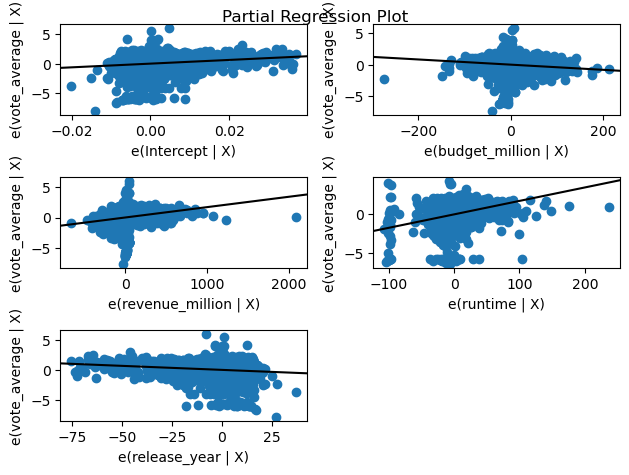

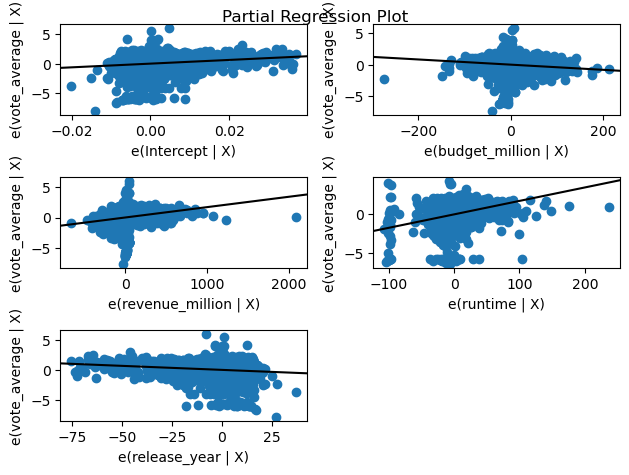

In [29]:
sm.graphics.plot_partregress_grid(model)

In [30]:
movies_numeric.head(5)

,vote_average,budget,revenue,runtime,release_year,budget_million,revenue_million
0,7.2,237000000,2787965087,162.0,2009.0,237.0,2787.965087
1,6.9,300000000,961000000,169.0,2007.0,300.0,961.000000
2,6.3,245000000,880674609,148.0,2015.0,245.0,880.674609
3,7.6,250000000,1084939099,165.0,2012.0,250.0,1084.939099
4,6.1,260000000,284139100,132.0,2012.0,260.0,284.139100


In [31]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1. Initialize the model
rf = RandomForestRegressor(random_state=42)

# 2. Fit on your training data
rf.fit(X_train, y_train)

# 3. Now you can access feature importances
importances = pd.Series(data=rf.feature_importances_,
                        index=X_train.columns)

# 4. Sort them
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)

runtime         0.405106
release_year    0.265504
budget          0.174680
revenue         0.154710
dtype: float64
